In [4]:
import torch
from torch import nn

import sys
import os
path = os.path.abspath("Helpers")
sys.path.append(path)
from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from timeit import default_timer as timer
from tqdm.auto import tqdm 

device = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 32
train_data = datasets.MNIST(
    root = "data", 
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.MNIST(
    root = "data", 
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

# image, label = train_data[0]
# print(image, label)
# print(train_data.classes)
# print(train_data.class_to_idx)   
# print(train_data.targets)
# print(image.shape)
# print(train_data.classes[label])

# plt.imshow(image.squeeze(), cmap = "gray")
# plt.title(train_data.classes[label])
# plt.axis(False)
# plt.show()

# torch.manual_seed(1)
# fig = plt.figure(figsize = (9, 9))
# rows, cols, = 4, 4
# for i in range(1, rows * cols + 1):
#     random_index = torch.randint(0, len(train_data), size = [1]).item()
#     img, label = train_data[random_index]
#     fig.add_subplot(rows, cols, i)
#     plt.imshow(img.squeeze(), cmap = "gray")
#     plt.title(train_data.classes[label])
#     plt.axis(False)

train_dataloader = DataLoader(dataset = train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size= BATCH_SIZE,
                             shuffle= False)

# print(f"Lenth of the train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
# print(f"Lenth of the test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

# torch.manual_seed(42)

# train_features_batch, train_label_batch = next(iter(train_dataloader))

# idx = torch.randint(0, len(train_features_batch), size=[1]).item()
# img, label = train_features_batch[idx], train_label_batch[idx]
# print(f"Image Size: {img.shape} Label: {label} LabelSize = {label.shape}")
# plt.imshow(img.squeeze(), cmap="gray")
# plt.title(train_data.classes[label])
# plt.axis(False)
# plt.show()

# # Create a flatten layer
# flatten_model = nn.Flatten()

# # Get a single sample
# x = train_features_batch[0]

# # Flatten the sample
# output = flatten_model(x)
# print(x.shape)
# print(output.shape)

# # Build a baseline model

# dummy_x = torch.rand([1, 28, 28])
# print(model_0(dummy_x).shape)

# Setup loss, optimizer and evaluation metrics
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model_0.parameters(), lr= 0.1)

def print_train_time(start, end, device=torch.device):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.2f} seconds")
    return  total_time
# start_time = timer()
# end_time = timer()
# print(print_train_time(start_time, end_time))

# 1. Loop through epochs.
# 2. Loop through training batches, perform training steps, calculate the train loss per batch.
# 3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
# 4. Print out what's happening.
# 5. Time it all (for fun).

# torch.manual_seed(42)

# train_time_start_on_cpu = timer()
# epochs = 3

# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n")
#     # Training
#     train_loss = 0
#     # Add a loop to loop through the training batches
#     for batch, (X, y) in enumerate(train_dataloader):
#         X.to(device)
#         y.to(device)
#         model_0.train()
#         # Forward pass
#         y_pred = model_0(X)

#         # Calculate loss
#         loss = loss_fn(y_pred, y)
#         train_loss += loss # Acccumulate train loss

#         # Optimizer zero grad
#         optimizer.zero_grad()
        
#         # Back propagation
#         loss.backward()

#         # Optimizer step
#         optimizer.step()

#         if batch % 400 == 0:
#             print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
#     # Divide total train loss by length of train dataloader
#     train_loss /= len(train_dataloader)

#     ### Testing
#     test_loss, test_acc = 0, 0
#     model_0.eval()
#     with torch.inference_mode():
#         for X, y in test_dataloader:
#             test_pred = model_0(X)
#             test_loss += loss_fn(test_pred, y)

#             test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1)) 
#         test_loss /= len(test_dataloader)
#         test_acc /= len(test_dataloader)

#     print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
# train_time_end_on_cpu = timer()
# total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
#                                            end=train_time_end_on_cpu,
#                                            device=str(next(model_0.parameters()).device))

def eval_model(model, data_loader, loss_fn, accuracy_fn, device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # Make Predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim = 1))
        # Scale the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

        return {
            "model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc
        }
    
# model_0_result = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn, "cpu")
# print(model_0_result)
class FashionMNISTModelV0(nn.Module):
    def __init__(self, inf, outf, hidden):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=inf, out_features=hidden),
            nn.Linear(in_features=hidden, out_features=outf)
        )

    def forward(self, data):
        return self.layer_stack(data)

class FashionMNISTModelV1(nn.Module):
    def __init__(self, inf, outf, hidden):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=inf, out_features=hidden),
            nn.ReLU(),
            nn.Linear(in_features=hidden, out_features=outf),
            nn.ReLU()
        )

    def forward(self, data):
        return self.layer_stack(data)
    
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units):
        super().__init__()
        self.cnn_block_1 = nn.Sequential(
            nn.Conv2d(  
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,  #
                stride = 1,     #
                padding = 1     # padding
                    ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,  #
                stride = 1,     #
                padding = 1     # padding
                    ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.cnn_block_2 = nn.Sequential(
            nn.Conv2d(  
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,  #
                stride = 1,     #
                padding = 1     # padding
                    ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=output_shape,
                kernel_size=3,  #
                stride = 1,     #
                padding = 1     # padding
                    ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=490, out_features=output_shape)
        )

    def forward(self, data):
        data = self.cnn_block_1(data)
        # print(f"Data shape after CONV block 1: {data.shape}")
        data = self.cnn_block_2(data)
        # print(f"Data shape after CONV block 2: {data.shape}")
        data = self.classifier(data)
        # print(f"Data shape after classifier: {data.shape}")
        return data


def train_step(model, dataloader, loss_fn, optimizer, accuracy_fn, device):
    model.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)
        # Calculate loss
        loss = loss_fn(y_pred, y)

        train_loss += loss # Acccumulate train loss
        train_acc += accuracy_fn(y, y_pred.argmax(dim = 1))
        # Optimizer zero grad
        optimizer.zero_grad()
        # Back propagation
        loss.backward()
        # Optimizer step
        optimizer.step()
    # Divide total train loss by length of train dataloader
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.5f}")

def test_step(model, dataloader, loss_fn, accuracy_fn, device):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1)) 
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

def train_loop(epochs, model, train_dataloader, test_dataloader, optimizer, loss_fn, accuracy_fn, device):
    for epoch in tqdm(range(epochs)):
        print(f"\nEpoch: {epoch}\n")
        train_step(model, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
        test_step(model, test_dataloader, loss_fn, accuracy_fn, device)

# torch.cuda.manual_seed(42) 
# torch.manual_seed(42)
# model_0 = FashionMNISTModelV0(784, 10, len(train_data.classes)).to(device)

# torch.cuda.manual_seed(42)
# torch.manual_seed(42)   
# model_1 = FashionMNISTModelV1(784, 10, len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()

# train_loop(
#     epochs = 3, 
#     model = model_0, 
#     train_dataloader = train_dataloader, 
#     test_dataloader = test_dataloader, 
#     optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1), 
#     loss_fn = loss_fn, 
#     accuracy_fn = accuracy_fn,  
#     device = device
#     )

# train_loop(
#     epochs = 3, 
#     model = model_1, 
#     train_dataloader = train_dataloader, 
#     test_dataloader = test_dataloader, 
#     optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1), 
#     loss_fn = loss_fn, 
#     accuracy_fn = accuracy_fn,  
#     device = device
#     )

# model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn, device)
# model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn, device)
# print(model_0_results)
# print(model_1_results)

# torch.manual_seed(42)

# images = torch.randn(size = (32, 1, 2, 2))
# test_image = images[0]

# conv_layer = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride = 2, padding = 0)
# max_pool_layer = nn.MaxPool2d(kernel_size = 2)
# # res = conv_layer(test_image)
# res = max_pool_layer(test_image)
# # print(test_image.shape)
# print(test_image)
# print(res.shape)
# print(res)
# plt.imshow(test_image.squeeze(), cmap="gray")
# plt.show()
# image, label = train_data[0]
# print(image.shape)
# res = model_2(image.unsqueeze(dim = 1).to(device))
# print(res)
# # plt.imshow(res.squeeze(), cmap="gray")
# # plt.show()

torch.cuda.manual_seed(42)
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape = 10).to(device)

start_time_conv = timer()
train_loop(
    epochs = 0, 
    model = model_2, 
    train_dataloader = train_dataloader, 
    test_dataloader = test_dataloader, 
    optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.1), 
    loss_fn = loss_fn, 
    accuracy_fn = accuracy_fn,  
    device = device
    )
end_time_conv = timer()
total_time_model2 = print_train_time(start_time_conv, end_time_conv, device)

model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn, 
    device = device 
)

0it [00:00, ?it/s]


Train time on cuda: 0.00 seconds


In [193]:
torch.cuda.manual_seed(42) 
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(784, 10, len(train_data.classes)).to(device)

torch.cuda.manual_seed(42)
torch.manual_seed(42)   
model_1 = FashionMNISTModelV1(784, 10, len(train_data.classes)).to(device)
start_time_model0 = timer()
train_loop(
    epochs = 3, 
    model = model_0, 
    train_dataloader = train_dataloader, 
    test_dataloader = test_dataloader, 
    optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1), 
    loss_fn = loss_fn, 
    accuracy_fn = accuracy_fn,  
    device = device
    )
end_time_model0 = timer()
total_time_model0 = print_train_time(start_time_model0, end_time_model0)
start_time_model1 = timer()
train_loop(
    epochs = 3, 
    model = model_1, 
    train_dataloader = train_dataloader, 
    test_dataloader = test_dataloader, 
    optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1), 
    loss_fn = loss_fn, 
    accuracy_fn = accuracy_fn,  
    device = device
    )
end_time_model1 = timer()
total_time_model1 = print_train_time(start_time_model1, end_time_model1)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0

Train Loss: 0.40639 | Train Acc: 88.39167


 33%|███▎      | 1/3 [00:08<00:16,  8.09s/it]

Test loss: 0.30468 | Test accuracy: 91.46%


Epoch: 1

Train Loss: 0.30808 | Train Acc: 91.33333


 67%|██████▋   | 2/3 [00:16<00:08,  8.05s/it]

Test loss: 0.30500 | Test accuracy: 91.31%


Epoch: 2

Train Loss: 0.29525 | Train Acc: 91.64333


100%|██████████| 3/3 [00:24<00:00,  8.09s/it]


Test loss: 0.32403 | Test accuracy: 90.62%

Train time on <class 'torch.device'>: 24.26 seconds


  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0

Train Loss: 0.64349 | Train Acc: 79.78167


 33%|███▎      | 1/3 [00:08<00:16,  8.47s/it]

Test loss: 0.47760 | Test accuracy: 83.82%


Epoch: 1

Train Loss: 0.30406 | Train Acc: 91.13000


 67%|██████▋   | 2/3 [00:16<00:08,  8.29s/it]

Test loss: 0.24764 | Test accuracy: 92.83%


Epoch: 2

Train Loss: 0.25531 | Train Acc: 92.62000


100%|██████████| 3/3 [00:24<00:00,  8.19s/it]

Test loss: 0.25928 | Test accuracy: 92.49%

Train time on <class 'torch.device'>: 24.56 seconds


In [194]:
model_0_results = eval_model(
    model = model_0,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn, 
    device = device 
)
model_1_results = eval_model(
    model = model_1,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn, 
    device = device 
)
print(model_0_results)
print(model_1_results)
print(model_2_results)


{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.32402604818344116, 'model_acc': 90.625}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.25927940011024475, 'model_acc': 92.49201277955271}
{'model_name': 'FashionMNISTModelV2', 'model_loss': 2.303372859954834, 'model_acc': 10.313498402555911}


In [5]:
train_loop(
    epochs = 5, 
    model = model_2, 
    train_dataloader = train_dataloader, 
    test_dataloader = test_dataloader, 
    optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.1), 
    loss_fn = loss_fn, 
    accuracy_fn = accuracy_fn,  
    device = device
    )

  0%|          | 0/5 [00:00<?, ?it/s]


Epoch: 0

Train Loss: 0.25240 | Train Acc: 91.52500


 20%|██        | 1/5 [00:09<00:37,  9.49s/it]

Test loss: 0.06778 | Test accuracy: 97.89%


Epoch: 1

Train Loss: 0.06872 | Train Acc: 97.89667


 40%|████      | 2/5 [00:18<00:28,  9.45s/it]

Test loss: 0.04836 | Test accuracy: 98.36%


Epoch: 2

Train Loss: 0.05358 | Train Acc: 98.30167


 60%|██████    | 3/5 [00:28<00:18,  9.42s/it]

Test loss: 0.04201 | Test accuracy: 98.55%


Epoch: 3

Train Loss: 0.04513 | Train Acc: 98.58167


 80%|████████  | 4/5 [00:37<00:09,  9.42s/it]

Test loss: 0.04334 | Test accuracy: 98.49%


Epoch: 4

Train Loss: 0.03980 | Train Acc: 98.73500


100%|██████████| 5/5 [00:47<00:00,  9.41s/it]

Test loss: 0.03969 | Test accuracy: 98.80%



In [6]:
start_time_conv = timer()
train_loop(
    epochs = 3, 
    model = model_2, 
    train_dataloader = train_dataloader, 
    test_dataloader = test_dataloader, 
    optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.1), 
    loss_fn = loss_fn, 
    accuracy_fn = accuracy_fn,  
    device = device
    )
end_time_conv = timer()
total_time_model2 = print_train_time(start_time_conv, end_time_conv, device)

model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn, 
    device = device 
)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0

Train Loss: 0.03577 | Train Acc: 98.87000


 33%|███▎      | 1/3 [00:09<00:19,  9.66s/it]

Test loss: 0.03803 | Test accuracy: 98.74%


Epoch: 1

Train Loss: 0.03411 | Train Acc: 98.89833


 67%|██████▋   | 2/3 [00:18<00:09,  9.44s/it]

Test loss: 0.04381 | Test accuracy: 98.45%


Epoch: 2

Train Loss: 0.03003 | Train Acc: 99.04833


100%|██████████| 3/3 [00:28<00:00,  9.44s/it]

Test loss: 0.03092 | Test accuracy: 99.01%

Train time on cuda: 28.32 seconds


In [325]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results["trainin_time"] = [total_time_model0, total_time_model1, total_time_model2]
compare_results

,model_name,model_loss,model_acc,trainin_time
0,FashionMNISTModelV0,0.324026,90.625000,24.258723
1,FashionMNISTModelV1,0.259279,92.492013,24.558918
2,FashionMNISTModelV2,2.303373,10.313498,0.001925


Text(0, 0.5, 'model_name')

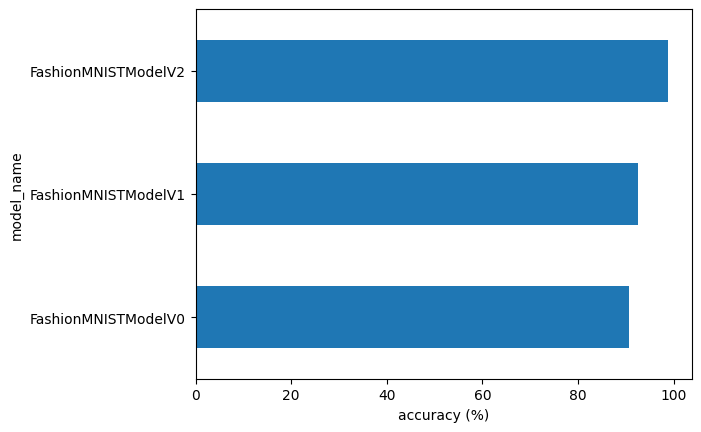

In [199]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model_name")


In [7]:
# Make and evaluate random predictions with best model

def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)
device

'cuda'

# fig = plt.figure(figsize = (9, 9))
# rows, cols, = 4, 4
# for i in range(1, rows * cols + 1):
#     random_index = torch.randint(0, len(train_data), size = [1]).item()
#     img, label = train_data[random_index]
#     fig.add_subplot(rows, cols, i)
#     plt.imshow(img.squeeze(), cmap = "gray")
#     plt.title(train_data.classes[label])
#     plt.axis(False)

In [336]:
train_loop(
    epochs = 3, 
    model = model_2, 
    train_dataloader = train_dataloader, 
    test_dataloader = test_dataloader, 
    optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.001), 
    loss_fn = loss_fn, 
    accuracy_fn = accuracy_fn,  
    device = device
    )

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0

Train Loss: 0.00352 | Train Acc: 99.94167


 33%|███▎      | 1/3 [00:10<00:21, 10.64s/it]

Test loss: 0.03340 | Test accuracy: 99.10%


Epoch: 1

Train Loss: 0.00350 | Train Acc: 99.94167


 67%|██████▋   | 2/3 [00:20<00:10, 10.40s/it]

Test loss: 0.03344 | Test accuracy: 99.10%


Epoch: 2

Train Loss: 0.00348 | Train Acc: 99.94333


100%|██████████| 3/3 [00:31<00:00, 10.45s/it]

Test loss: 0.03358 | Test accuracy: 99.10%



In [8]:
import random

test_images = []
test_labels = []
img, label = test_data[0]
for img, label in test_data:
    test_images.append(img)
    test_labels.append(label)
# plt.imshow(test_samples[1].squeeze(), cmap = "gray")
# plt.title(test_data.classes[test_labels[1]])
# plt.axis(False)

In [9]:
pred_probs= make_predictions(model=model_2, 
                             data=test_images)
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 2, 1,  ..., 4, 5, 6])

In [10]:

img, label = test_data[0]
img.shape

torch.Size([1, 28, 28])

In [11]:
classes = test_data.classes

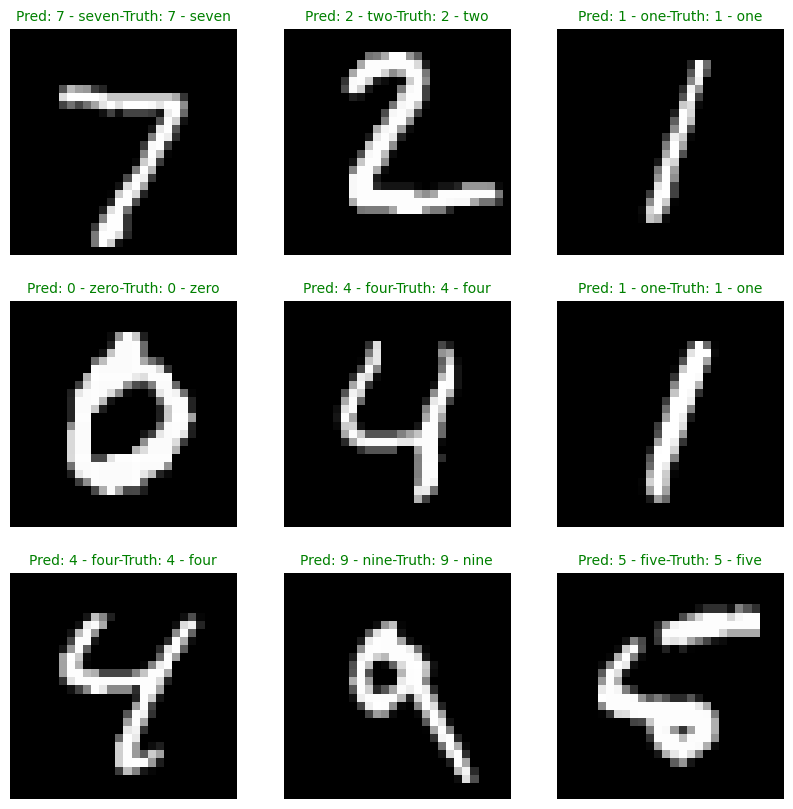

In [13]:
plt.figure(figsize=(10, 10))
rows = 3
cols = 3
track = 0
for i, img in enumerate(test_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img.squeeze(), cmap = "gray")
    pred_label = classes[pred_classes[i]]
    truth_label = classes[test_labels[i]]
    title_text = f"Pred: {pred_label}-Truth: {truth_label}"
    if truth_label == pred_label:
        plt.title(title_text, c = "g", fontsize = 10)
    else:
        plt.title(title_text, c = "r", fontsize = 10)
    plt.axis(False)
    track += 1
    if track == 9:
        break

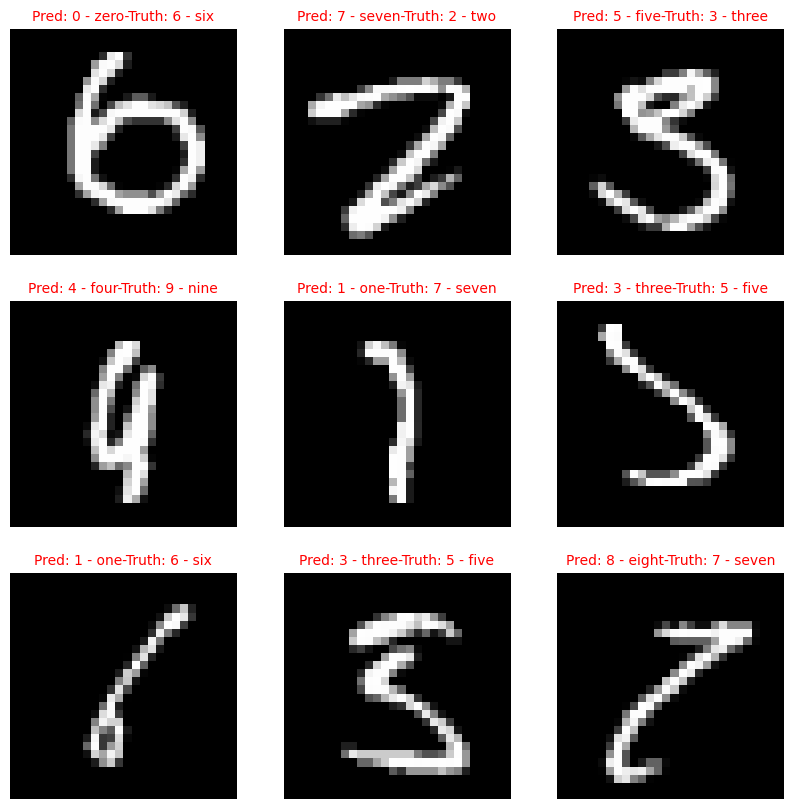

In [14]:
plt.figure(figsize=(10, 10))
rows = 3
cols = 3
track = 0
skip = 0
for i, img in enumerate(test_images):
    pred_label = classes[pred_classes[i]]
    truth_label = classes[test_labels[i]]
    if truth_label != pred_label and skip % 7 == 0:
        plt.subplot(rows, cols, track + 1)
        plt.imshow(img.squeeze(), cmap = "gray")
        
        title_text = f"Pred: {pred_label}-Truth: {truth_label}"
        plt.title(title_text, c = "r", fontsize = 10)
        plt.axis(False)
        track += 1
        if track == 9:
            break
    skip += 1